# Problem Statement

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. The project below presents a solution that would allow her to determine whether ads targeted to audiences of certain characteristics i.e. city, male country, ad topic, etc. would click on her ads. 

The solution involves creating a prediction model that will accurately predict whether a user will click an Ad.


# Metrics of Success

# Experimental Design

# Loading the Dataset

In [207]:
#code to suppress warnings
#setting the option warn 
options(warn=-1)

In [208]:
#installing the packages
# List of packages
package_list <- c("tidyverse", "lubridate", "readxl", "tidyr", "Hmisc", "skimr",
                  "ggcorrplot","caret", "caretEnsemble", "PerformanceAnalytics",
                  "kableExtra", "kernlab", "randomForest", "xgboost")

# Load/Install packages
suppressMessages(pacman::p_load(package_list, character.only = TRUE))

In [ ]:
#installing the package anytime so as to convert the column timestamp into a date datatype
install.packages("anytime")

In [257]:
#loading the dataset and coverting it into Tibble
adv <- read.csv("advertising.csv")

head(adv)


Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [248]:
#previewing the number of rows in the dataset
nrow(adv)

[1] 1000

In [249]:
#previewing the number of columns in the dataset
ncol(adv)

[1] 10

In [250]:
#checking the dataset dimension
dim(adv)

[1] 1000   10

# Data Cleaning and Exploration

In [251]:
#checking the column names
colnames(adv)

[1] "Daily.Time.Spent.on.Site" "Age"                     
 [3] "Area.Income"              "Daily.Internet.Usage"    
 [5] "Ad.Topic.Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked.on.Ad"

In [258]:
#converting the column names into lower case and stripping the '.' to ensure uniformity

colnames(adv) = tolower(str_replace_all(colnames(adv), c('[.]' = '_')))

In [259]:
#checking the column names have been changed
colnames(adv)

[1] "daily_time_spent_on_site" "age"                     
 [3] "area_income"              "daily_internet_usage"    
 [5] "ad_topic_line"            "city"                    
 [7] "male"                     "country"                 
 [9] "timestamp"                "clicked_on_ad"

In [260]:
# Exploring the variables in the dataset using the glimpse function
glimpse(adv)

Observations: 1,000
Variables: 10
$ daily_time_spent_on_site <dbl> 68.95, 80.23, 69.47, 74.15, 68.37, 59.99, ...
$ age                      <int> 35, 31, 26, 29, 35, 23, 33, 48, 30, 20, 49...
$ area_income              <dbl> 61833.90, 68441.85, 59785.94, 54806.18, 73...
$ daily_internet_usage     <dbl> 256.09, 193.77, 236.50, 245.89, 225.58, 22...
$ ad_topic_line            <fct> Cloned 5thgeneration orchestration, Monito...
$ city                     <fct> Wrightburgh, West Jodi, Davidton, West Ter...
$ male                     <int> 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...
$ country                  <fct> Tunisia, Nauru, San Marino, Italy, Iceland...
$ timestamp                <fct> 2016-03-27 00:53:11, 2016-04-04 01:39:02, ...
$ clicked_on_ad            <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, ...


In [ ]:
# #separating the timestamp variable into date and time columns since the two are together
# adv %>% separate(Timestamp, into = paste0(c('Date','time')), sep = ' ')

In [261]:
#converting the column timestamp to date data type
adv$timestamp <- anytime::anydate(adv$timestamp)

In [262]:
#checking to see if the change in data type conversion have been effected
glimpse(adv)

Observations: 1,000
Variables: 10
$ daily_time_spent_on_site <dbl> 68.95, 80.23, 69.47, 74.15, 68.37, 59.99, ...
$ age                      <int> 35, 31, 26, 29, 35, 23, 33, 48, 30, 20, 49...
$ area_income              <dbl> 61833.90, 68441.85, 59785.94, 54806.18, 73...
$ daily_internet_usage     <dbl> 256.09, 193.77, 236.50, 245.89, 225.58, 22...
$ ad_topic_line            <fct> Cloned 5thgeneration orchestration, Monito...
$ city                     <fct> Wrightburgh, West Jodi, Davidton, West Ter...
$ male                     <int> 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...
$ country                  <fct> Tunisia, Nauru, San Marino, Italy, Iceland...
$ timestamp                <date> 2016-03-27, 2016-04-04, 2016-03-13, 2016-...
$ clicked_on_ad            <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, ...


In [263]:
head(adv,10)

daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19,0
88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28,0
66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07,1
74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18,0
69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11,0


In [264]:
#checking the number of missing values in each column using the colSums() function
colSums(is.na(adv))

daily_time_spent_on_site                      age              area_income 
                       0                        0                        0 
    daily_internet_usage            ad_topic_line                     city 
                       0                        0                        0 
                    male                  country                timestamp 
                       0                        0                        0 
           clicked_on_ad 
                       0

####### The dataset does not have any missing values.

In [265]:
#Checking the data type of each column 

sapply(adv, class)

daily_time_spent_on_site                      age              area_income 
               "numeric"                "integer"                "numeric" 
    daily_internet_usage            ad_topic_line                     city 
               "numeric"                 "factor"                 "factor" 
                    male                  country                timestamp 
               "integer"                 "factor"                   "Date" 
           clicked_on_ad 
               "integer"

In [340]:
# #converting the columns in integer datatype to numeric datatype i.e column 2,7 and 10

# cols_to_change = c(2, 7, 10)
# for(i in cols_to_change){
#    class(adv[, i]) = "numeric"
# }

In [345]:
 #converting the columns in integer datatype to numeric datatype i.e column 2,7 and 10
adv[, c(2,7,10)] <- sapply(adv[, c(2,7,10)], as.numeric)

In [344]:
#confirming the changes have been made
sapply(adv, class)

daily_time_spent_on_site                      age              area_income 
               "numeric"                "numeric"                "numeric" 
    daily_internet_usage            ad_topic_line                     city 
               "numeric"                 "factor"                 "factor" 
                    male                  country                timestamp 
               "numeric"                 "factor"                   "Date" 
           clicked_on_ad 
               "numeric"

In [346]:
#checking for the number of unique values in the dataset
sapply(adv, function(x) length(unique(x)))

daily_time_spent_on_site                      age              area_income 
                     900                       43                     1000 
    daily_internet_usage            ad_topic_line                     city 
                     966                     1000                      969 
                    male                  country                timestamp 
                       2                      237                      203 
           clicked_on_ad 
                       2

####From the output the area income, all values are unique. I shall check below the outliers in the area income column


In [328]:
#checking for duplicate values
anyDuplicated(adv)

[1] 0

There are no duplicate values in the dataset.

# Data Analysis
## Univariate Analysis

In [347]:
#statistical summaries of the variables
#these show the measures of central tendencies and dispersion
summary(adv)

 daily_time_spent_on_site      age         area_income    daily_internet_usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
                                                                              
                                 ad_topic_line              city    
 Adaptive 24hour Graphic Interface      :  1   Lisamouth      :  3  
 Adaptive asynchronous attitude         :  1   Williamsport   :  3  
 Adaptive context-sensitive application :  1   Benjaminchester:  2  
 Adaptive contextually-based methodology:  1   East John      :  2  
 Adaptive demand-driven

In [348]:
install.packages("psych")
library(psych)


In [350]:
#measures of central tendencies and dispersion
describe(adv)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
daily_time_spent_on_site,1,1000,65.0002,1.585361e+01,68.215,65.74090,17.92463,32.60,91.43,58.83,-0.370645950,-1.0998638,0.50133531
age,2,1000,36.0090,8.785562e+00,35.000,35.50625,8.89560,19.00,61.00,42.00,0.477705222,-0.4097066,0.27782387
area_income,3,1000,55000.0001,1.341463e+04,57012.300,56038.93815,13316.62424,13996.50,79484.80,65488.30,-0.648422850,-0.1110924,424.20797488
daily_internet_usage,4,1000,180.0001,4.390234e+01,183.130,179.98620,58.61459,104.78,269.96,165.18,-0.033436814,-1.2757525,1.38831387
ad_topic_line*,5,1000,500.5000,2.888194e+02,500.500,500.50000,370.65000,1.00,1000.00,999.00,0.000000000,-1.2036006,9.13327251
city*,6,1000,487.3230,2.793116e+02,485.500,487.51125,356.56530,1.00,969.00,968.00,-0.002957293,-1.1893592,8.83260741
male,7,1000,0.4810,4.998889e-01,0.000,0.47625,0.00000,0.00,1.00,1.00,0.075940878,-1.9962262,0.01580787
country*,8,1000,116.4090,6.994214e+01,114.500,115.81875,89.69730,1.00,237.00,236.00,0.076151967,-1.2328105,2.21176482
timestamp,9,1000,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
clicked_on_ad,10,1000,0.5000,5.002502e-01,0.500,0.50000,0.74130,0.00,1.00,1.00,0.000000000,-2.0019990,0.01581930


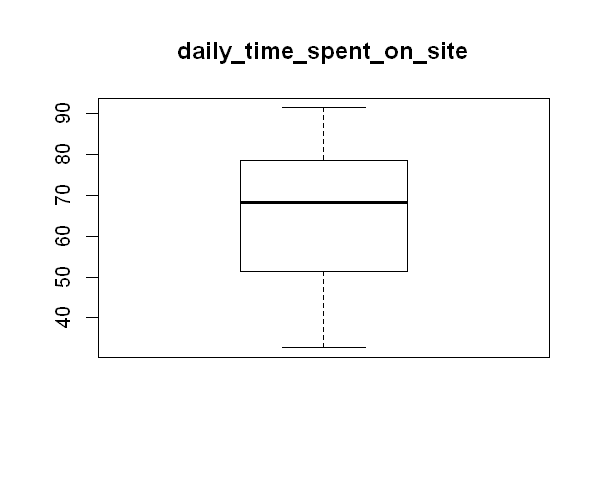

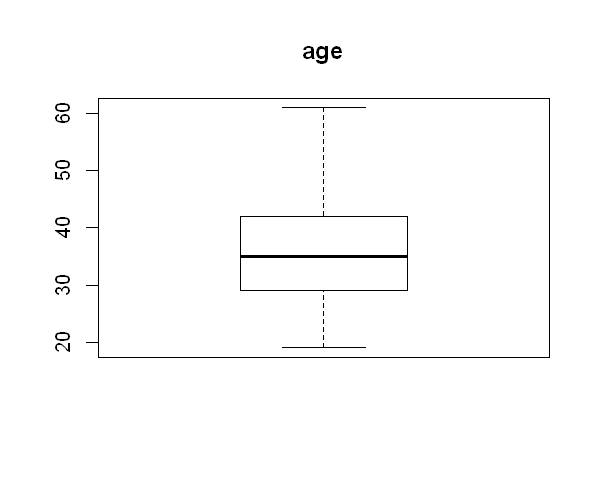

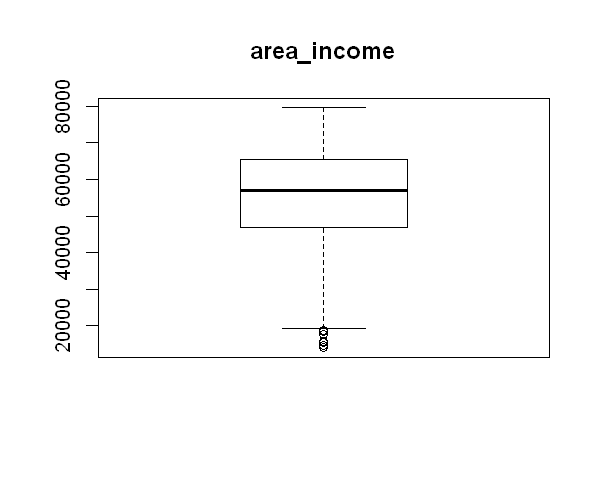

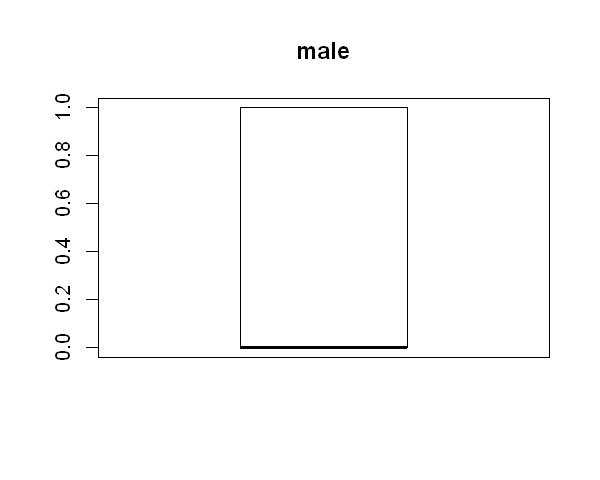

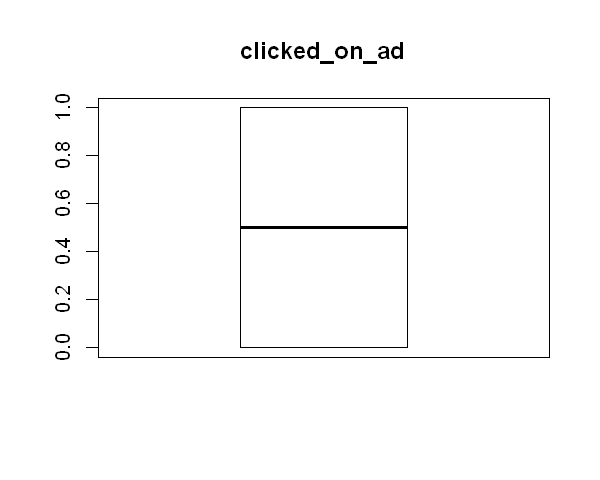

In [396]:
#checking the dataset for any outliers
options(repr.plot.width = 5, repr.plot.height = 4)
numeric_cols = c(1,2,3,7,10)
for(i in numeric_cols){
    boxplot(adv[i], main =colnames(adv)[i])

}

The column area income which is the 3rd column, has presence of outliers. Before doing anything with them let me look at the unique values in that column then.

The rest of the numeric columns do not show any presence of outliers.


In [294]:
#examining the dataset belongs to what class
class(adv)

[1] "data.frame"

In [308]:
#checking the list of outliers in the area-income variable
boxplot.stats(adv$area_income)$out

[1] 17709.98 18819.34 15598.29 15879.10 14548.06 13996.50 14775.50 18368.57

The outliers list in the area income variable are not alot and I opt to work with them as is as they may provide insights in the analysis

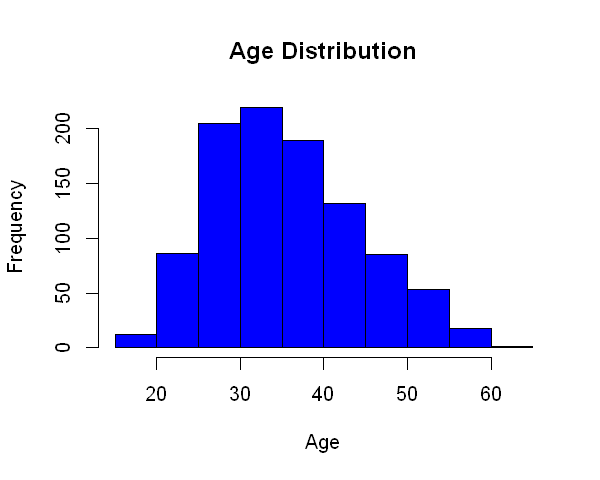

In [360]:
#plotting the distribution of the age variable
hist(adv$age, col = 'blue',
    main = 'Age Distribution',
    xlab = 'Age',
    ylab = 'Frequency')


Most of the people who click adds fall in the age between 25 and 40

The data is also skewed to the right

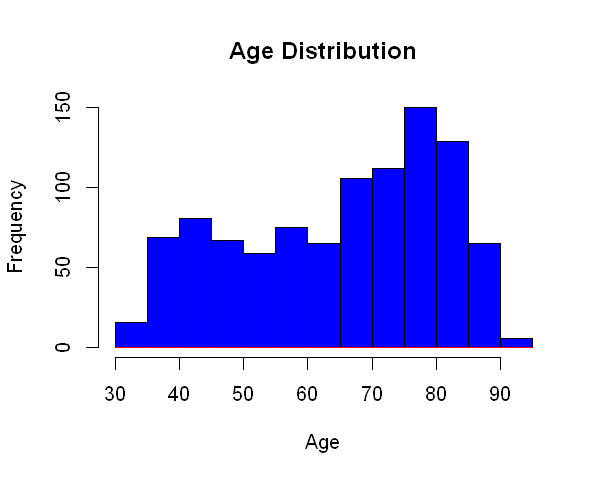

In [437]:
#plotting the distribution of the age variable
hist(adv$daily_time_spent_on_site, col = 'blue',
    main = 'Age Distribution',
    xlab = 'Age',
    ylab = 'Frequency')
curve(dnorm(x, mean=mean(adv$daily_time_spent_on_site), sd=sd(adv$daily_time_spent_on_site)), add=TRUE, col="red") #line

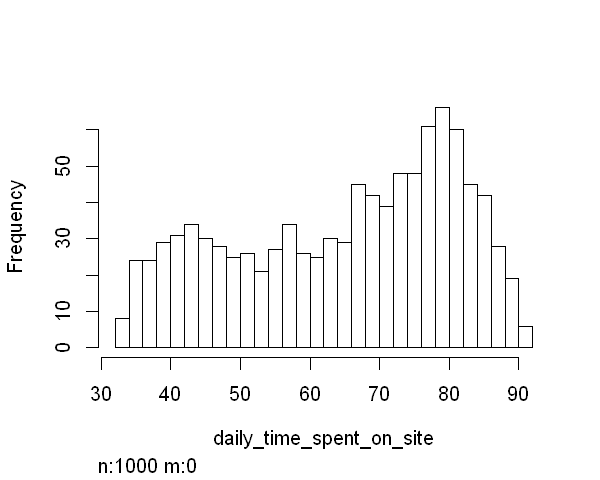

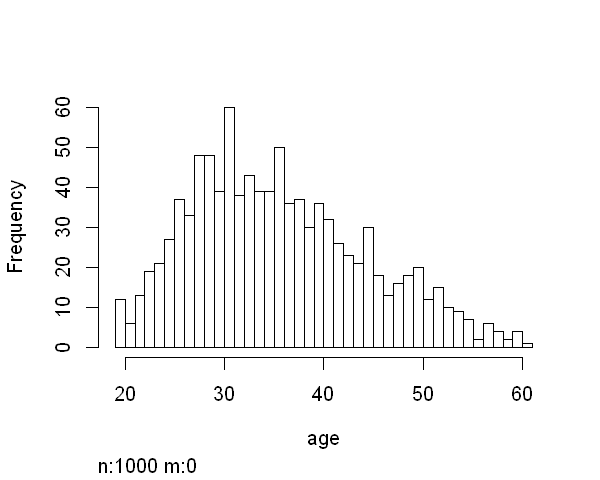

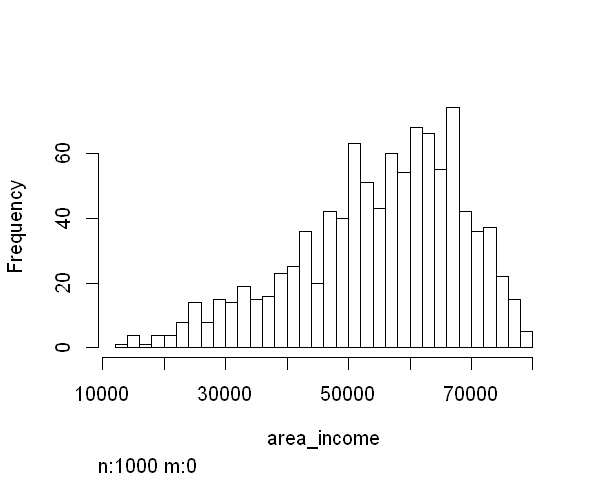

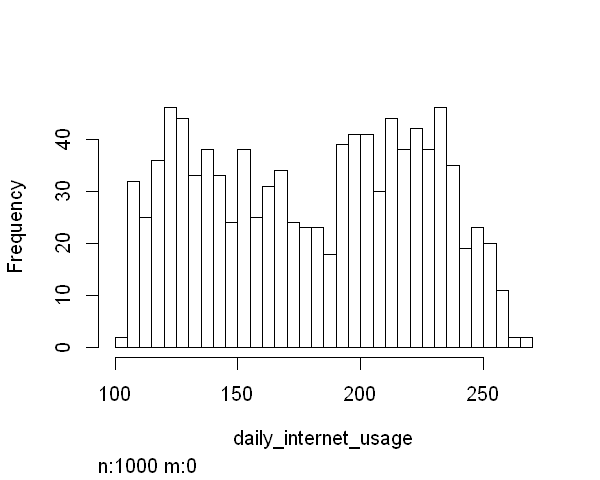

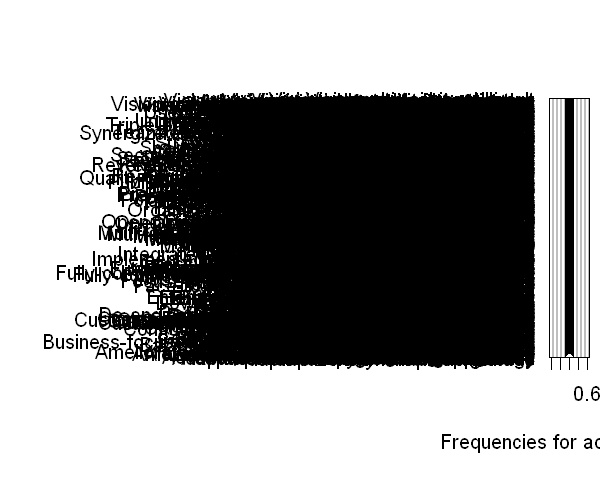

In [438]:
numeric_cols = colnames(select(adv, c(1,2,3,7,10)))
for(i in 1:5)
{
    hist(adv[i], main =colnames(adv)[i], breaks = 20)
         
#             col = c("blue", "red", "gray", "green")) 
}

In [412]:
head(adv,2)

daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04,0


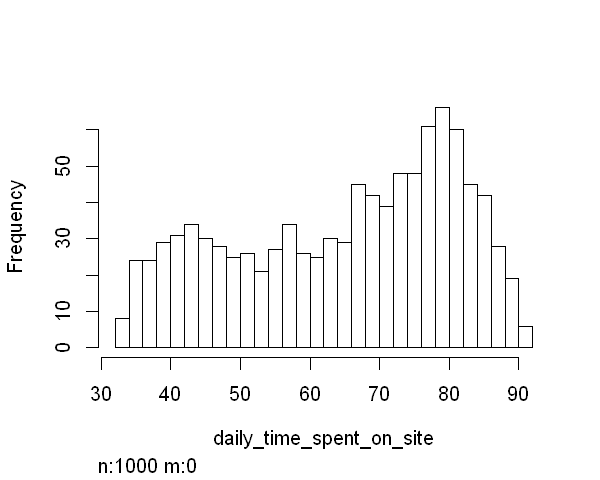

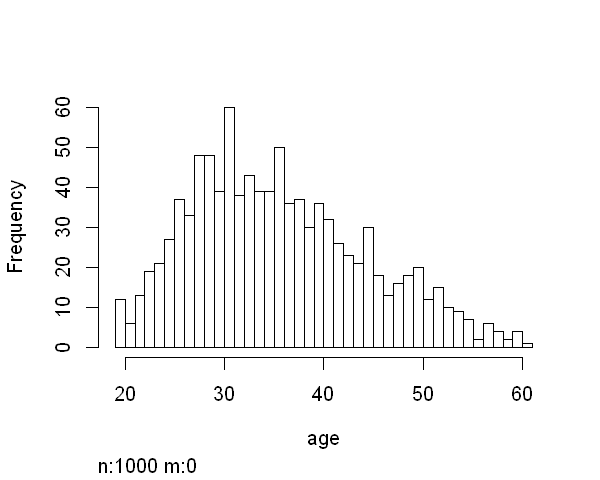

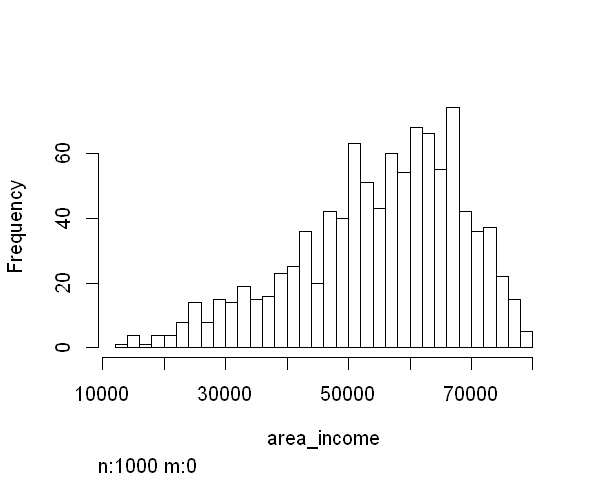

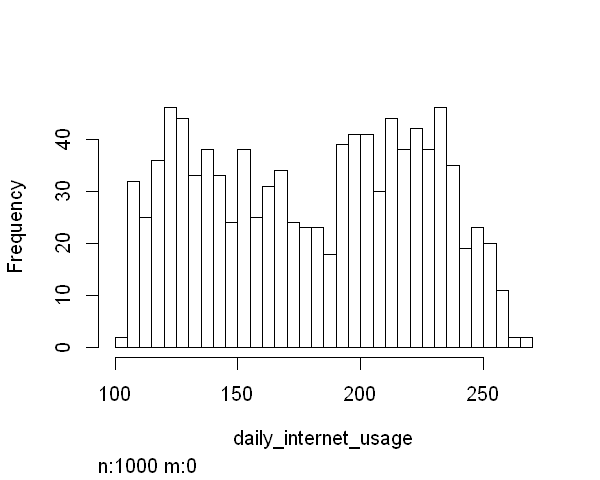

In [423]:
num_cols = c('daily_time_spent_on_site', 'age', 'area_income', 'daily_internet_usage')
df = select(adv, num_cols)

colors = c( "red", "green", "blue" , 'magenta')
                          
for(i in 1:4){
    hist(df[i], col = colors[i])
}

In [422]:
df[1]

daily_time_spent_on_site
68.95
80.23
69.47
74.15
68.37
59.99
88.91
66.00
74.53
69.88
